# Load in the data
Here I have flow data and ENSO data alltogether

In [211]:
flows = read.csv('FraserRiverAnnualExtremes.csv',skip=1)
flows = subset(flows, !is.na(flows$max)) # remove all years without max annual discharge values
ensos = read.csv('ensoPhaseAnnual.csv',skip=5)

In [212]:
mask = match(flows$year,ensos$year) # all elements into ensos that correspond to the years in flows
oni = ensos$oni[mask]
q = flows$max

# Do regression analysis on maximum annual discharge

In [209]:
cor.test(q,oni) # conduct pearson's correlation test
# you find a statistically significant result for a positive relationship. proceed with regression analysis


	Pearson's product-moment correlation

data:  q and oni
t = -4.3717, df = 103, p-value = 2.954e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5458847 -0.2206788
sample estimates:
       cor 
-0.3956111 



	Pearson's product-moment correlation

data:  flows$year and flows$max
t = -0.16672, df = 103, p-value = 0.8679
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2074376  0.1757933
sample estimates:
        cor 
-0.01642541 


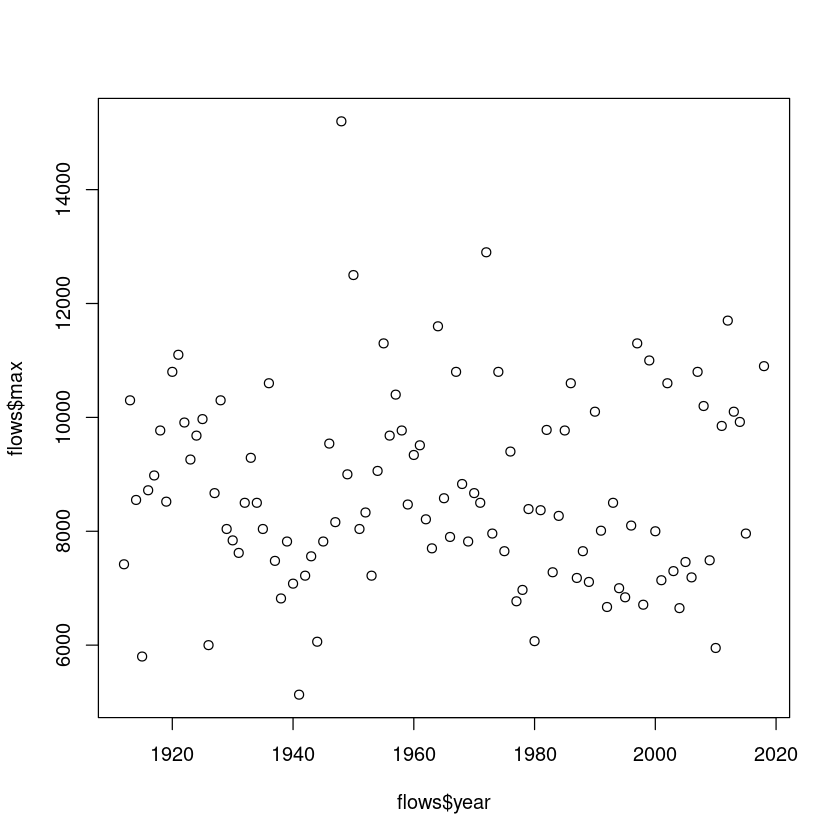

In [4]:
plot(flows$year,flows$max)
cor.test(flows$year,flows$max)


	Pearson's product-moment correlation

data:  q and oni
t = -4.3717, df = 103, p-value = 2.954e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5458847 -0.2206788
sample estimates:
       cor 
-0.3956111 


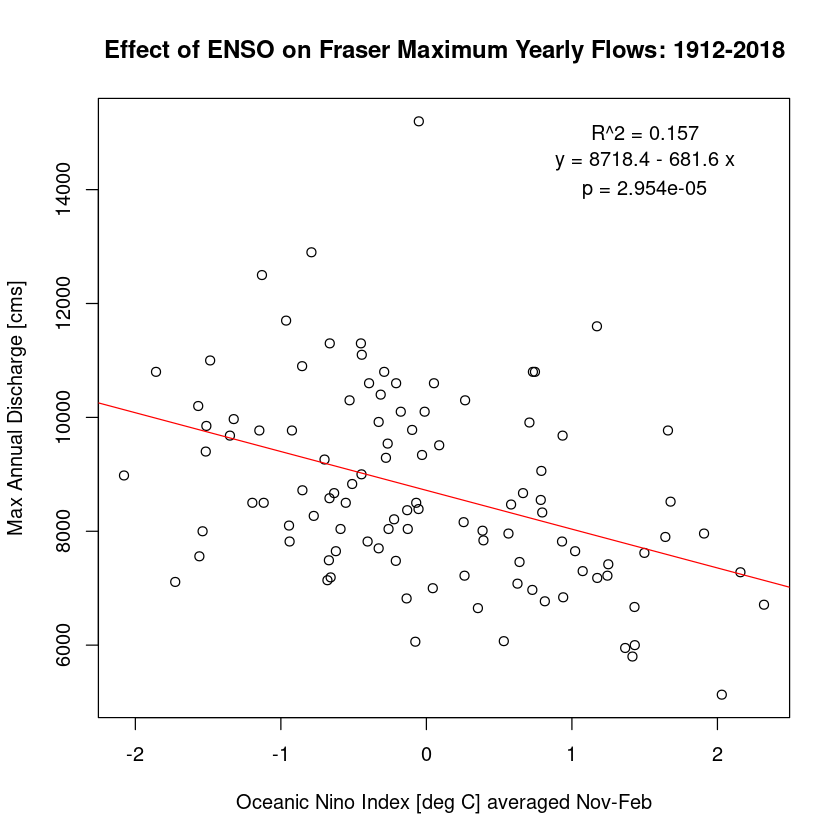

In [5]:
plot(oni,q,xlab='Oceanic Nino Index [deg C] averaged Nov-Feb',ylab='Max Annual Discharge [cms]',main='Effect of ENSO on Fraser Maximum Yearly Flows: 1912-2018')
cor.test(q,oni)
l = lm(q~oni)
#summary(l) # summarize the parameters of the linear fit
abline(l,col='red') # add in th eline

text(1.5,14000,'p = 2.954e-05') # put the linear model, p value of pearson's correlation coefficient,..
text(1.5,14500,'y = 8718.4 - 681.6 x') # .. and coefficient of determiniation in the plot
text(1.5,15000,'R^2 = 0.157')

# now pull in snow data from the fraser basin on Apr 1st swe

In [213]:
snow = read.csv("../snow/fraserBasinSnowData.csv",skip=9) # load the data
snow = subset(snow,!is.na(snow$swe)) # filter out any nan values

In [218]:
# scale the snow data for comparision
means = aggregate(swe~station,data=snow,FUN=mean)
stdevs = aggregate(swe~station,data=snow,FUN=sd)
# see http://www.u.arizona.edu/~conniew1/geog532/Moteetal.2005.pdf
z = (snow$swe - means$swe[match(snow$station,means$station)])/stddevs$swe[match(snow$station,stdevs$station)]

In [219]:
cor.test(snow$year,z)


	Pearson's product-moment correlation

data:  snow$year and z
t = -4.4818, df = 571, p-value = 8.946e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2622929 -0.1040039
sample estimates:
       cor 
-0.1843434 


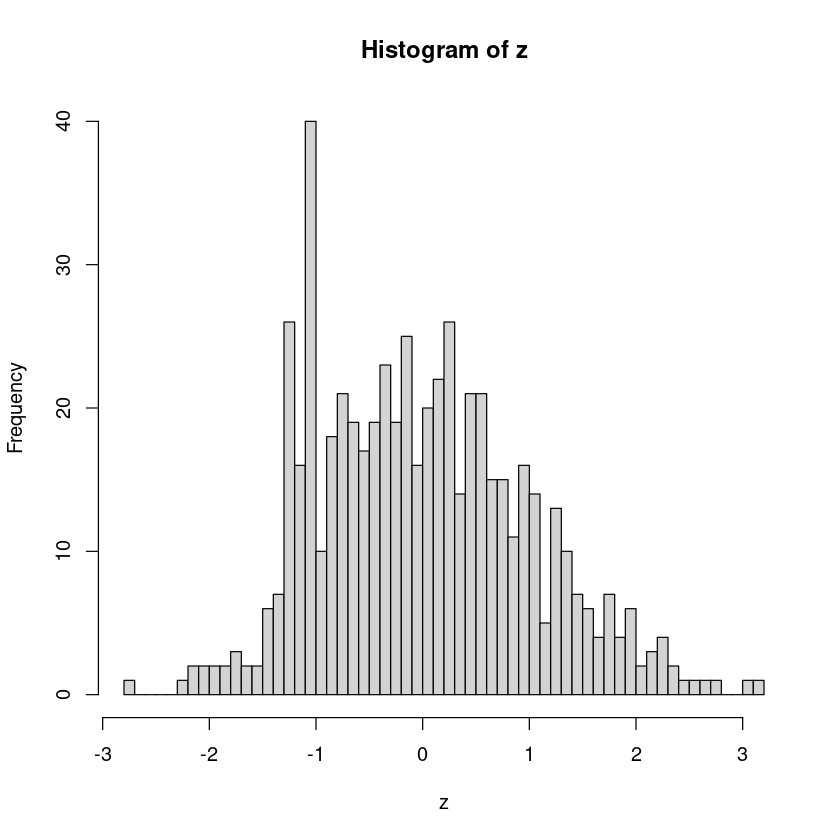

In [99]:
hist(z,breaks=60)

In [148]:
meanAnnual = aggregate(z~year,data=snow,FUN=mean) # average the z scores over all years

i = match(meanAnnual$year,ensos$year)
meanAnnual$oni = ensos$oni[i]
meanAnnual = subset(meanAnnual,!is.na(meanAnnual$oni)) # this filters all missing 2021 ONI values

In [149]:
cor.test(meanAnnual$z,meanAnnual$oni)


	Pearson's product-moment correlation

data:  meanAnnual$z and meanAnnual$oni
t = -2.9277, df = 74, p-value = 0.004534
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5105616 -0.1043154
sample estimates:
       cor 
-0.3221935 


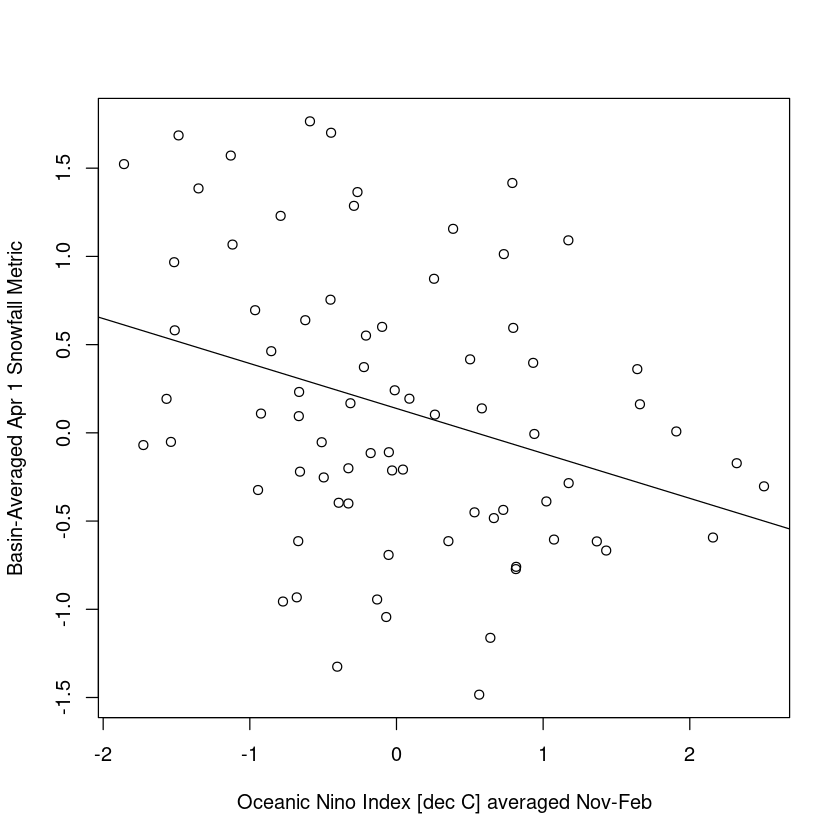

In [152]:
plot(z~oni,data=meanAnnual,xlab='Oceanic Nino Index [dec C] averaged Nov-Feb',ylab='Basin-Averaged Apr 1 Snowfall Metric')
l = lm(z~oni,data=meanAnnual)
abline(l)


In [159]:
t.test(meanAnnual$z[meanAnnual$oni>0.6], meanAnnual$z[meanAnnual$oni< -0.6])


	Welch Two Sample t-test

data:  meanAnnual$z[meanAnnual$oni > 0.6] and meanAnnual$z[meanAnnual$oni < -0.6]
t = -2.3574, df = 40.964, p-value = 0.02326
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.96844049 -0.07474236
sample estimates:
 mean of x  mean of y 
-0.1002586  0.4213329 


In [160]:
# so snowfall in the fraser basin increases during la nina and decreases during el nino. Bam

In [161]:
# how does annual discharge depend on snowfall? 

In [175]:
maxes = flows$max[match(flows$year,meanAnnual$year)]

In [183]:
max = flows$max[match(meanAnnual$year,flows$year)]

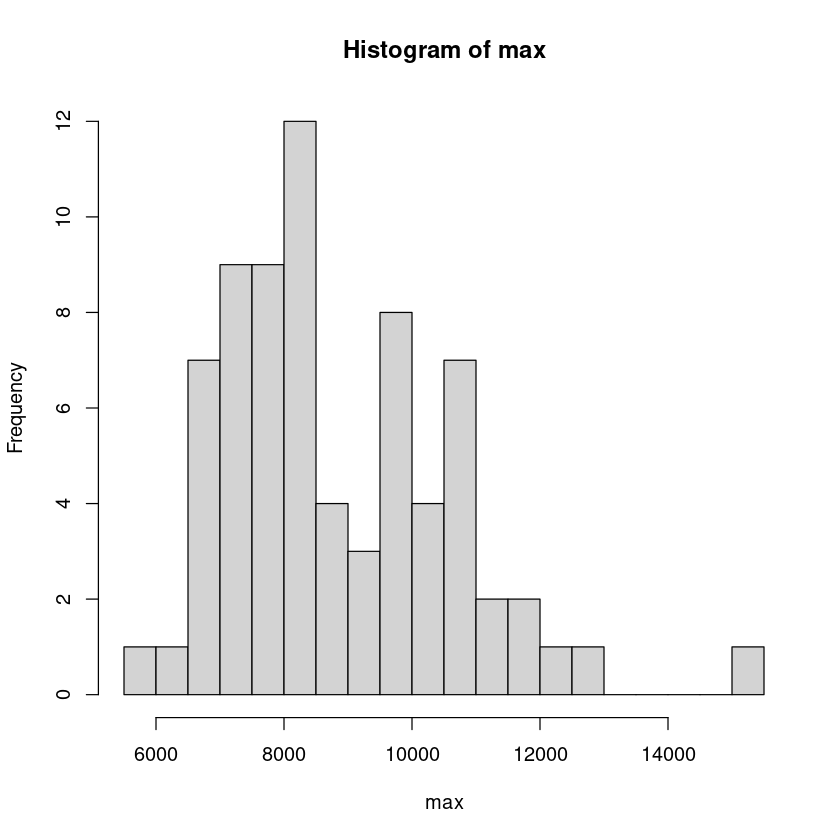

In [193]:
hist(max,breaks=20)

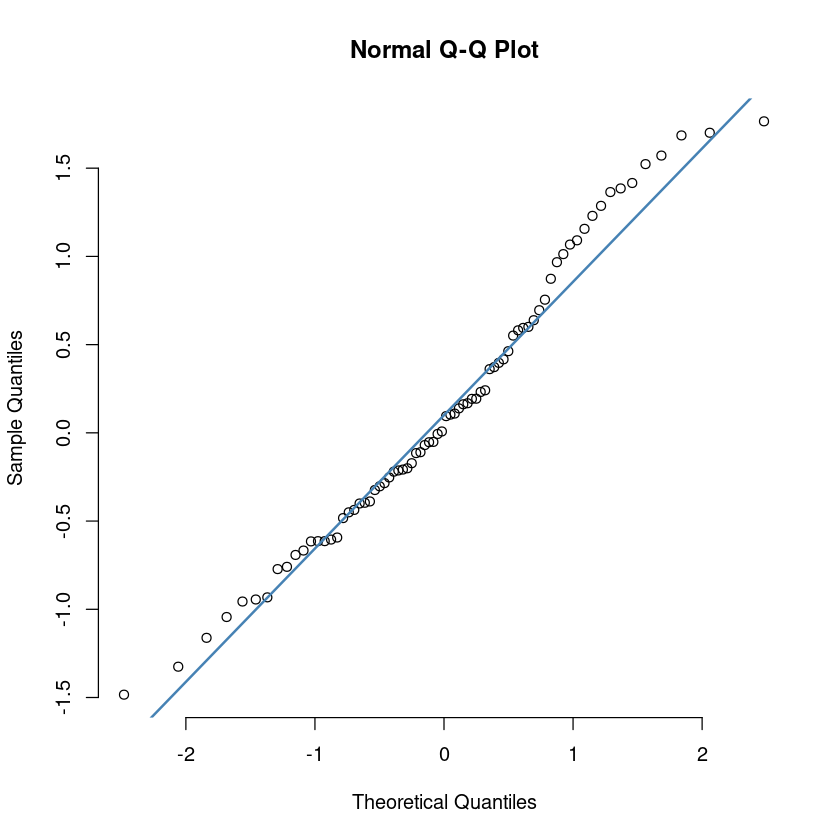

In [206]:
var = meanAnnual$z
qqnorm(var, pch = 1, frame = FALSE)
qqline(var, col = "steelblue", lwd = 2)

In [195]:
cor.test(meanAnnual$z,max)


	Pearson's product-moment correlation

data:  meanAnnual$z and max
t = 4.9185, df = 70, p-value = 5.559e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3117198 0.6608680
sample estimates:
      cor 
0.5067901 


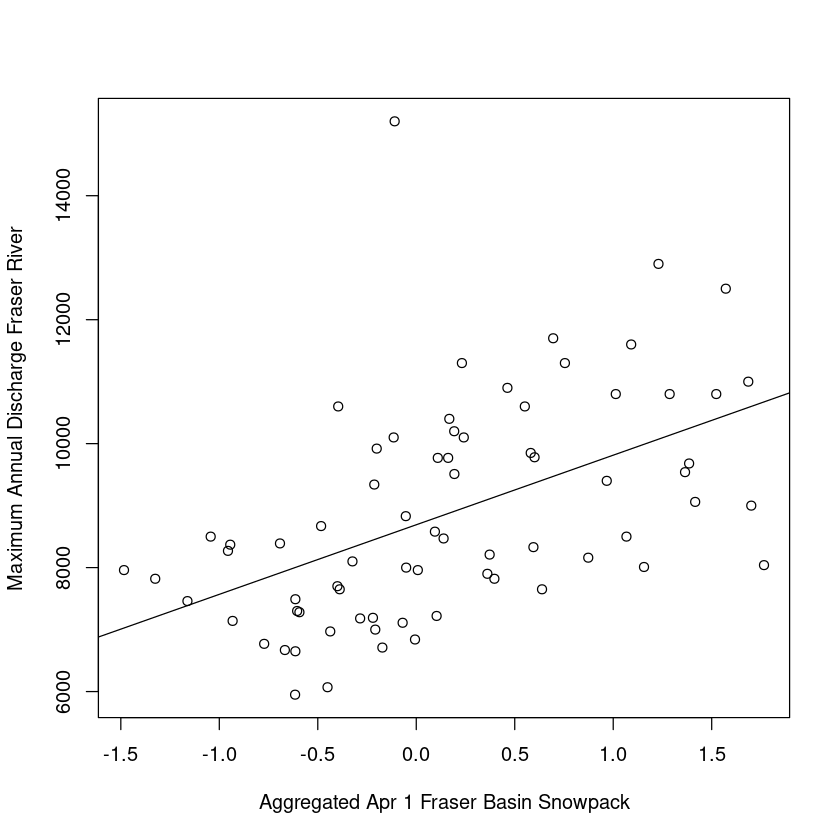

In [197]:
plot(meanAnnual$z,max,xlab="Aggregated Apr 1 Fraser Basin Snowpack",ylab="Maximum Annual Discharge Fraser River")
l = lm(max~meanAnnual$z)
abline(l)

conclusion here is that the aggregated fraser basin snowpack from 15 gauging stations describes about 25% in the variance of maximum annual stream discharge. We conclude the fraser basin maximum annual discharge is largely due to snowmelt. 